In [4]:
%%capture capt
!pip install scikit-learn==1.1.2
!pip install -U scikit-survival
from tqdm import tqdm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest

set_config(display="text")  # displays text representation of estimators

## Test Example

## Notre base

In [5]:
profil_patient=pd.read_csv("../data/profil_patient.csv")
profil_patient['CHOC']=profil_patient['CHOC'].astype(int)
profil_patient

,CODE_PATIENT,date_h0,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,Mort,Nb_survie,Nb_hospit,CHOC,Nb_jours_sej,cat_age,cat_nb_hospit,cat_nb_jours_sej,cluster
0,P0,2011-11-22,1949,11,1,NaN,False,2596,9,0,23,1,1,1,0
1,P6,2013-12-05,1929,14,2,2015-03,True,456,8,0,51,2,1,1,1
2,P8,2015-07-02,1967,54,2,2015-08,True,41,3,1,43,0,1,1,2
3,P13,2011-05-19,1959,974,1,NaN,False,2783,2,0,3,0,1,0,3
4,P16,2010-03-18,1947,76,1,NaN,False,3210,9,0,28,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,P24302,2014-02-08,1920,29,1,2014-12,True,318,8,0,47,2,1,1,12
10047,P24303,2012-02-09,1927,61,1,2017-05,True,1924,12,0,86,2,2,2,6
10048,P24304,2010-07-27,1924,999,1,2010-08,True,5,1,0,10,2,0,1,13
10049,P24308,2011-11-25,1925,13,2,2013-03,True,484,7,0,99,2,1,2,1


In [3]:
data=profil_patient[['y_nais','BEN_SEX_COD','Nb_hospit','CHOC','Nb_jours_sej','cluster']]
Label= profil_patient[['Mort','Nb_survie']].to_records(index=False)
Label

rec.array([(False, 2596), ( True,  456), ( True,   41), ...,
           ( True,    5), ( True,  484), (False, 2935)],
          dtype=[('Mort', '?'), ('Nb_survie', '<i8')])

In [4]:
random_state = 20

X_train, X_test, y_train, y_test = train_test_split(data, Label, test_size=0.25, random_state=random_state)

In [8]:
rsf = RandomSurvivalForest(n_estimators=1000,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           n_jobs=-1,
                           random_state=random_state,
                           verbose=0)
rsf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 30 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 390 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 740 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.5min finished


RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10,
                     n_estimators=1000, n_jobs=-1, random_state=20, verbose=1)

In [9]:
rsf.score(X_test, y_test)

[Parallel(n_jobs=30)]: Using backend ThreadingBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 140 tasks      | elapsed:    0.7s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:    1.6s
[Parallel(n_jobs=30)]: Done 740 tasks      | elapsed:    2.8s
[Parallel(n_jobs=30)]: Done 1000 out of 1000 | elapsed:    3.6s finished


0.6807206893779263

In [10]:
X_test_sorted = X_test.sort_values(by=['y_nais'])
X_test_sel = pd.concat((X_test_sorted.head(3), X_test_sorted.tail(3)))

X_test_sel

,y_nais,BEN_SEX_COD,Nb_hospit,CHOC,Nb_jours_sej,cluster
5471,1909,2,5,0,35,1
1275,1910,2,2,0,4,1
4626,1910,2,6,0,62,1
9775,1990,1,3,0,48,3
472,1991,1,19,0,67,5
6602,1994,2,62,1,135,15


In [11]:
pd.Series(rsf.predict(X_test_sel))

[Parallel(n_jobs=30)]: Using backend ThreadingBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 140 tasks      | elapsed:    0.1s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:    0.1s
[Parallel(n_jobs=30)]: Done 740 tasks      | elapsed:    0.2s
[Parallel(n_jobs=30)]: Done 1000 out of 1000 | elapsed:    0.2s finished


0    3160.879601
1    3315.282432
2    2463.374281
3    1158.473107
4     380.825466
5     454.293035
dtype: float64

[Parallel(n_jobs=30)]: Using backend ThreadingBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 140 tasks      | elapsed:    0.1s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:    0.1s
[Parallel(n_jobs=30)]: Done 740 tasks      | elapsed:    0.2s
[Parallel(n_jobs=30)]: Done 1000 out of 1000 | elapsed:    0.3s finished


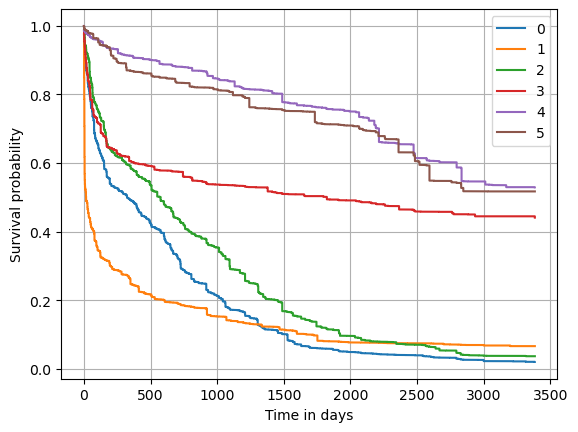

In [12]:
surv = rsf.predict_survival_function(X_test_sel, return_array=True)

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

[Parallel(n_jobs=30)]: Using backend ThreadingBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 140 tasks      | elapsed:    0.1s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:    0.1s
[Parallel(n_jobs=30)]: Done 740 tasks      | elapsed:    0.2s
[Parallel(n_jobs=30)]: Done 1000 out of 1000 | elapsed:    0.3s finished


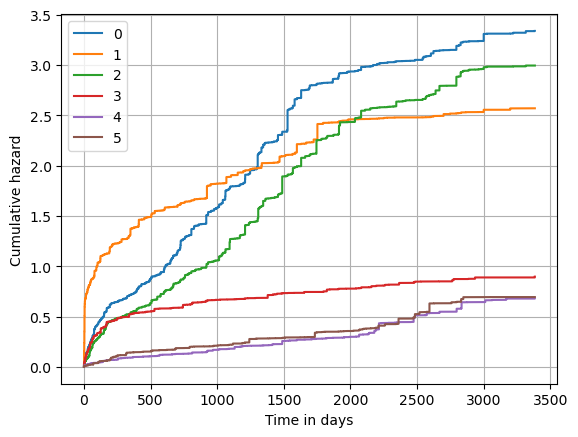

In [13]:
surv = rsf.predict_cumulative_hazard_function(X_test_sel, return_array=True)

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Cumulative hazard")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rsf, X_test, y_test, n_repeats=15, random_state=random_state)

In [16]:
pd.DataFrame(
    {k: result[k] for k in ("importances_mean", "importances_std",)},
    index=X_test.columns
).sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
y_nais,0.076927,0.006315
Nb_hospit,0.070946,0.003016
Nb_jours_sej,0.034826,0.002130
cluster,0.008921,0.001933
CHOC,0.008184,0.001062
BEN_SEX_COD,-0.000037,0.000794


## Essai 2

In [40]:
data=profil_patient[['y_nais','BEN_SEX_COD','Nb_hospit','CHOC','Nb_jours_sej']]
Label= profil_patient[['Mort','Nb_survie']].to_records(index=False)
Label

rec.array([(False, 2596), ( True,  456), ( True,   41), ...,
           ( True,    5), ( True,  484), (False, 2935)],
          dtype=[('Mort', '?'), ('Nb_survie', '<i8')])

In [41]:
random_state = 20

X_train, X_test, y_train, y_test = train_test_split(data, Label, test_size=0.25, random_state=random_state)

In [42]:
rsf = RandomSurvivalForest(n_estimators=10,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           n_jobs=-1,
                           random_state=random_state,
                           verbose=0)
rsf.fit(X_train, y_train)

RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10, n_estimators=10,
                     n_jobs=-1, random_state=20)

In [43]:
rsf.score(X_test, y_test)

0.6800203708532239

In [44]:
X_test_sorted = X_test.sort_values(by=['y_nais'])
X_test_sel = pd.concat((X_test_sorted.head(5), X_test_sorted.tail(5)))

X_test_sel

,y_nais,BEN_SEX_COD,Nb_hospit,CHOC,Nb_jours_sej
5471,1909,2,5,0,35
1275,1910,2,2,0,4
4626,1910,2,6,0,62
6656,1911,2,3,0,21
7931,1911,2,1,0,3
2839,1989,1,11,0,31
4785,1990,2,69,0,534
9775,1990,1,3,0,48
472,1991,1,19,0,67
6602,1994,2,62,1,135


In [45]:
pd.Series(rsf.predict(X_test_sel))

0    2933.054222
1    3337.722395
2    2299.950504
3    3583.113316
4    3823.498199
5     279.304095
6     334.042669
7    1103.071313
8     473.079062
9     540.844745
dtype: float64

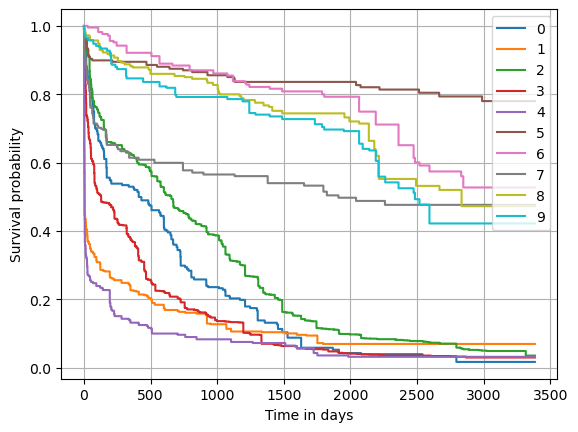

In [46]:
surv = rsf.predict_survival_function(X_test_sel, return_array=True)

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

In [47]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rsf, X_test, y_test, n_repeats=10, random_state=random_state)

In [48]:
pd.DataFrame(
    {k: result[k] for k in ("importances_mean", "importances_std",)},
    index=X_test.columns
).sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
y_nais,0.099873,0.005762
Nb_hospit,0.097267,0.003617
Nb_jours_sej,0.041301,0.002802
CHOC,0.007474,0.000810
BEN_SEX_COD,0.006968,0.001160


In [49]:
rsf.decision_path(X_train)

(<7538x4142 sparse matrix of type '<class 'numpy.int64'>'
 	with 784406 stored elements in Compressed Sparse Row format>,
 array([   0,  413,  784, 1241, 1662, 2061, 2508, 2977, 3342, 3781, 4142]))

In [50]:
from sksurv.compare import compare_survival
print("Compares the pooled hazard rate with each group-specific hazard rate.")
print("The alternative hypothesis is that the hazard rate of at least one group differs from the others at some time.")
print("Valeur de la statistique | p-valeur")
compare_survival(Label[0:20], X_test[0:20], return_stats=False)

Compares the pooled hazard rate with each group-specific hazard rate.
The alternative hypothesis is that the hazard rate of at least one group differs from the others at some time.
Valeur de la statistique | p-valeur


(204.9744519431937, 1.280361921944441e-21)

## Recherche du bon nombre d'estimateurs pour les Survival Random Forest 

In [30]:
data=profil_patient[['y_nais','BEN_SEX_COD','Nb_hospit','CHOC','Nb_jours_sej']]
Label= profil_patient[['Mort','Nb_survie']].to_records(index=False)
Label

rec.array([(False, 2596), ( True,  456), ( True,   41), ...,
           ( True,    5), ( True,  484), (False, 2935)],
          dtype=[('Mort', '?'), ('Nb_survie', '<i8')])

In [31]:
random_state = 20

X_train, X_test, y_train, y_test = train_test_split(data, Label, test_size=0.25, random_state=random_state)

0.652056659676005
0.6678363689235909
0.6712864896383667
0.6761966091659071
0.676667934052838
0.6784792192500431
0.6796078441686084
0.6779475933313446
0.679030945512664
0.6800203708532239
0.6802410989290086
0.6793076539855413
0.6797044009609091
0.6806523106378534
0.6805328356964074
0.6808384736362386
0.6803513690400602
0.6807201258168817
0.6806943898625136


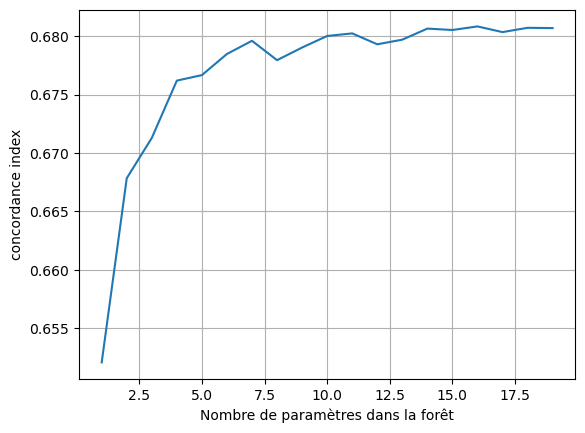

In [39]:
Liste_score = []
Liste_nb_estimators= []
rsf = RandomSurvivalForest(min_samples_split=10,
                           min_samples_leaf=15,
                           n_jobs=-1,
                           random_state=random_state,
                           verbose=0)
for i in range(1, 20):
    n_estimators = i * 1
    rsf.set_params(n_estimators=n_estimators)
    rsf.fit(X_train, y_train)
    Liste_score.append(rsf.score(X_test, y_test))
    Liste_nb_estimators.append(n_estimators)
    print(rsf.score(X_test, y_test))
    

plt.plot(Liste_nb_estimators, Liste_score)
plt.xlabel("Nombre de paramètres dans la forêt")
plt.ylabel("Concordance index")
plt.grid(True)

## Gradient boosting

In [96]:
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
data=profil_patient[['y_nais','BEN_SEX_COD','Nb_hospit','CHOC','Nb_jours_sej']]
Label= profil_patient[['Mort','Nb_survie']].to_records(index=False)

In [97]:
random_state = 20
X_train, X_test, y_train, y_test = train_test_split(data, Label, test_size=0.25, random_state=random_state)

In [55]:
est_cph_tree = GradientBoostingSurvivalAnalysis(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0, verbose=1)
est_cph_tree.fit(X_train, y_train)
cindex = est_cph_tree.score(X_test, y_test)
print(round(cindex, 3))

      Iter       Train Loss   Remaining Time 
         1       41144.3828           11.90s
         2       41048.9260           10.32s
         3       40973.7307            8.94s
         4       40924.5716            7.62s
         5       40895.6392            6.07s
         6       40867.9464            4.70s
         7       40840.2105            3.44s
         8       40815.7319            2.25s
         9       40786.0066            1.11s
        10       40763.6747            0.00s
0.664


In [ ]:
scores_cph_tree = {}
est_cph_tree = GradientBoostingSurvivalAnalysis(learning_rate=1.0, max_depth=1, random_state=0, verbose=1)
for i in range(1, 40,2):
    n_estimators = i 
    est_cph_tree.set_params(n_estimators=n_estimators)
    est_cph_tree.fit(X_train, y_train)
    scores_cph_tree[n_estimators] = est_cph_tree.score(X_test, y_test)

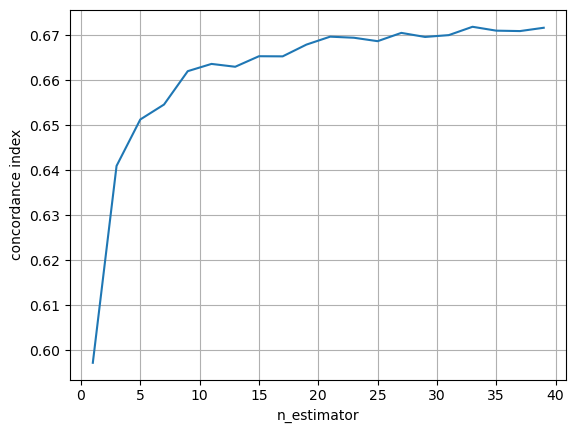

In [60]:
x, y = zip(*scores_cph_tree.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)

In [ ]:
scores_cph_ls = {}

est_cph_ls = ComponentwiseGradientBoostingSurvivalAnalysis(learning_rate=1.0, random_state=0,verbose=1)
for i in range(1, 40,2):
    n_estimators = i 
    est_cph_ls.set_params(n_estimators=n_estimators)
    est_cph_ls.fit(X_train, y_train)
    scores_cph_ls[n_estimators] = est_cph_ls.score(X_test, y_test)

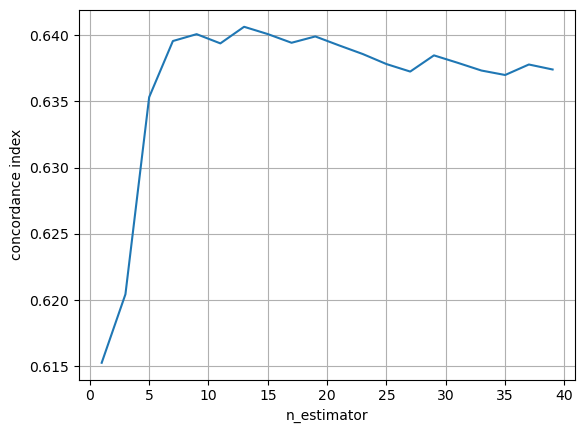

In [67]:
x, y = zip(*scores_cph_ls.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)

In [68]:
coef = pd.Series(est_cph_ls.coef_, ["Intercept"] + data.columns.tolist())

print("Number of non-zero coefficients:", (coef != 0).sum())
coef_nz = coef[coef != 0]
coef_order = coef_nz.abs().sort_values(ascending=False).index
coef_nz.loc[coef_order]

Number of non-zero coefficients: 3


CHOC            0.340372
Nb_hospit      -0.053137
Nb_jours_sej    0.004169
dtype: float64

In [95]:
profil_patient=profil_patient.dropna()
data=profil_patient[['y_nais','BEN_SEX_COD','Nb_hospit','CHOC','Nb_jours_sej']]
Label= profil_patient[['Mort','Nb_survie']].to_records(index=False)

data=data.dropna()

random_state = 20
X_train, X_test, y_train, y_test = train_test_split(data, Label, test_size=0.25, random_state=random_state)
est_aft_ls = ComponentwiseGradientBoostingSurvivalAnalysis(loss="ipcwls", n_estimators=300, learning_rate=1.0, random_state=0).fit(X_train, y_train)

cindex = est_aft_ls.score(X_test, y_test)
print(round(cindex, 3))

/opt/mamba/lib/python3.10/site-packages/sksurv/ensemble/boosting.py:308: RuntimeWarning: divide by zero encountered in log
  time = np.log(time)
/opt/mamba/lib/python3.10/site-packages/sksurv/ensemble/boosting.py:74: RuntimeWarning: invalid value encountered in subtract
  error[component] = squared_norm(residuals - l_pred)


ValueError: All-NaN slice encountered

In [ ]:
n_estimators = [i for i in range(1, 20,2)]

estimators = {
    "no regularization": GradientBoostingSurvivalAnalysis(
        learning_rate=1.0, max_depth=1, random_state=0,verbose=3),
    "learning rate": GradientBoostingSurvivalAnalysis(
        learning_rate=0.1, max_depth=1, random_state=0,verbose=3),
    "dropout": GradientBoostingSurvivalAnalysis(
        learning_rate=1.0, dropout_rate=0.1, max_depth=1, random_state=0,verbose=3),
    "subsample": GradientBoostingSurvivalAnalysis(
        learning_rate=1.0, subsample=0.5, max_depth=1, random_state=0,verbose=3),
}

scores_reg = {k: [] for k in estimators.keys()}
for n in n_estimators:
    for name, est in estimators.items():
        est.set_params(n_estimators=n)
        est.fit(X_train, y_train)
        cindex = est.score(X_test, y_test)
        scores_reg[name].append(cindex)

scores_reg = pd.DataFrame(scores_reg, index=n_estimators)

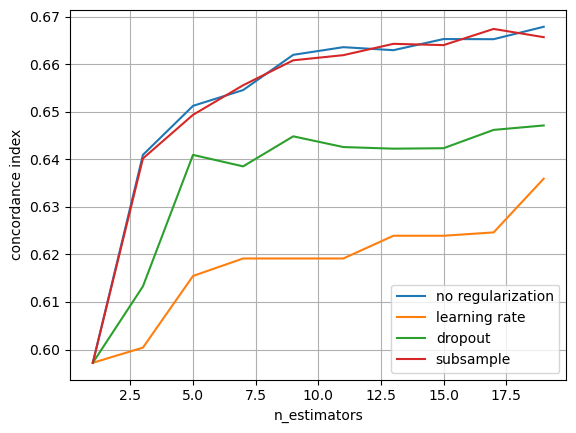

In [74]:
ax = scores_reg.plot(xlabel="n_estimators", ylabel="concordance index")
ax.grid(True)

In [78]:
class EarlyStoppingMonitor:

    def __init__(self, window_size, max_iter_without_improvement):
        self.window_size = window_size
        self.max_iter_without_improvement = max_iter_without_improvement
        self._best_step = -1

    def __call__(self, iteration, estimator, args):
        # continue training for first self.window_size iterations
        if iteration < self.window_size:
            return False

        # compute average improvement in last self.window_size iterations.
        # oob_improvement_ is the different in negative log partial likelihood
        # between the previous and current iteration.
        start = iteration - self.window_size + 1
        end = iteration + 1
        improvement = np.mean(estimator.oob_improvement_[start:end])

        if improvement > 1e-6:
            self._best_step = iteration
            return False  # continue fitting

        # stop fitting if there was no improvement
        # in last max_iter_without_improvement iterations
        diff = iteration - self._best_step
        return diff >= self.max_iter_without_improvement


est_early_stopping = GradientBoostingSurvivalAnalysis(
    n_estimators=50, learning_rate=1, subsample=0.5,
    max_depth=1, random_state=0,verbose=1)

monitor = EarlyStoppingMonitor(25, 50)

est_early_stopping.fit(X_train, y_train, monitor=monitor)

print("Fitted base learners:", est_early_stopping.n_estimators_)

cindex = est_early_stopping.score(X_test, y_test)
print("Performance on test set", round(cindex, 3))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1       18936.6205         167.6225           58.47s
         2       18917.1230          43.2169           57.71s
         3       18785.1037          32.3154           56.45s
         4       18611.5918          17.1792           55.31s
         5       18784.5490           9.4435           54.27s
         6       18563.2999          13.3022           53.08s
         7       18866.2925           7.0119           52.01s
         8       18669.2620           6.2588           50.80s
         9       18512.6978          13.4679           48.43s
        10       18759.6922          11.4091           46.32s
        20       18827.5139           5.2331           34.43s
        30       18444.2507          -2.6443           23.25s
        40       18731.6484          -2.0057           11.22s
        50       18371.4453          -5.2070            0.00s
Fitted base learners: 50
Performance on test set 0.672


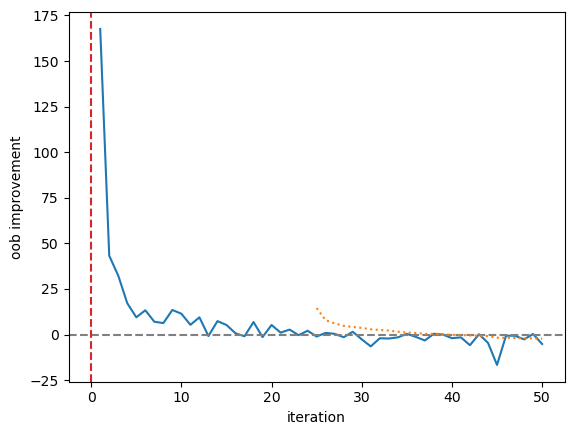

In [79]:
improvement = pd.Series(
    est_early_stopping.oob_improvement_,
    index=np.arange(1, 1 + len(est_early_stopping.oob_improvement_))
)
ax = improvement.plot(xlabel="iteration", ylabel="oob improvement")
ax.axhline(0.0, linestyle="--", color="gray")
cutoff = len(improvement) - monitor.max_iter_without_improvement
ax.axvline(cutoff, linestyle="--", color="C3")

_ = improvement.rolling(monitor.window_size).mean().plot(ax=ax, linestyle=":")

In [189]:
#https://scikit-survival.readthedocs.io/en/stable/user_guide/random-survival-forest.html